# Analyze precipitation data 

This notebook shows you the basic steps when analyzing precipitation data in a notebook. You will learn how to load a data file to a notebook, access this data file in Object Storage, and then load the content of the data file into a `pandas` DataFrame. Furthermore, you will learn how to explore and analyze the data in the DataFrame and how to vizualize your results by using the `matplotlib` library. 

This notebook runs on Python 2 with Spark 2.0.

## Table of contents
1. [Get data](#data_set)

2. [Load data](#load_data)

3. [Access data](#access_data)

4. [Explore data](#explore_data)

5. [Plot the results](#plot_data)

6. [Download the notebook](#download)

7. [Summary](#summary)


<a id="data_set"></a> 
## 1. Get data
In this notebook, you will explore and analyze historical annual precipitation data.

The raw precipitation data set is from [UNdata](http://data.un.org/), an Internet search engine for statistical databases provided by the United Nations Statistics Division. You will use a curated version of this data set in this sample. The precipitation measurements are in million cubic meters.

To get the precipitation data set:
1. Click [annual precipitation data set](https://cdsax.cloudant.com/public-samples/test/precipitation.csv) to download the data in CSV format.   
    Note: If you use Safari, right-click the link and select **Download Linked File**. The CSV file is downloaded to your `Download` folder.              
1. Save the CSV file to your computer.



<a id="load_data"></a>
## 2. Load data
You can add the CSV file that you downloaded to this notebook by clicking the **Data** icon on the notebook action bar and dragging the file to the `Data` pane in the notebook. 
The data file is listed on the `Data` pane and is saved in the Object Storage instance associated with your project.

In the next step, you will learn how to access files in Object Storage.

<a id="access_data"></a> 
## 3. Access data 

**[pandas](http://pandas.pydata.org/)** is a useful Python package for managing structured data.  The two primary data structures of pandas are [`Series`](http://pandas-docs.github.io/pandas-docs-travis/dsintro.html#series) (1-dimensional) and [`DataFrame`](http://pandas-docs.github.io/pandas-docs-travis/dsintro.html#dataframe) (2-dimensional).

In the following steps, you will load the `precipitation.csv` file into a DataFrame in memory.

To run code cells in a notebook, click Run Cell (**&#9658;**) in the notebook toolbar.  While the code in the cell is running, a `[*]` appears next to the cell. After the code has run, the `[*]` is replaced by a number indicating that the code cell is the *N*th cell to run in the notebook.

### Insert code to access the data source

To add the code to access the `precipitation.csv` file which is stored in Object Storage, click the next code cell and select **Insert to code>pandas DataFrame** on the data file that you loaded in the `Data` pane in the notebook.

This function inserts the setup and data loading code for you. The setup code includes importing the required packages and defining a helper function. The helper function includes the Object Storage credentials to access the `precipitation.csv` file. Then, the data in the `precipitation.csv` file is loaded into a `pandas DataFrame`.


<div class="alert alert-block alert-info">Note: The DataFrame that is created for you and filled with data is given a generic name. Rename the DataFrame to `precipitation_df` and run the code cell to proceed.</div>

<a id="explore_data"></a> 
## 4. Explore data

Now that your data is in memory, you can begin to explore and manipulate it.

Show the first five and the last five rows of the data by using the `head()` and `tail()` methods.  Run each code cell:

In [2]:
precipitation_df.head()

,Country or Area,1990,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Albania,28385.000000,40311.000000,0.000000,0.000000,0.0,38284.000000,30683.000000,30491.000000,35883.000000,27893.000000,42787.000000,42840.000000,32380.000000,30964.000000,0.000000,0.000000
1,Algeria,76160.000000,90270.000000,53380.000000,74460.000000,66470.0,50150.000000,64430.000000,43840.000000,37317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,0.000000
2,Andorra,539.947998,510.673004,560.340027,434.475006,254.0,450.151001,518.666016,456.626007,565.559021,566.583008,567.044006,530.278015,353.220001,306.630005,0.000000,0.000000
3,Anguilla,93.099998,100.730003,0.000000,0.000000,0.0,0.000000,68.190002,70.730003,68.190002,108.769997,84.250000,124.400002,99.550003,86.290001,96.889999,71.080002
4,Antigua and Barbuda,300.299988,374.500000,323.299988,279.200012,384.5,426.799988,249.600006,238.000000,268.600006,253.899994,426.899994,371.000000,332.799988,293.600006,392.500000,276.899994


In [3]:
precipitation_df.tail()

,Country or Area,1990,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
86,Turkey,399979,501301,0,0,0,0,462740,566247,495134,536428,490373,504580,492480,471248.000,0.0,0
87,United Kingdom,298070,259765,232622,260019,321155,314559,338989,266177,324685,228856,307431,273842,298282,303966.000,328562.0,307871
88,Venezuela,1630000,1520000,1420000,1470000,1520000,1560000,1360000,1360000,1420000,1195231,1520000,1560000,1060000,1335846.125,1293661.5,936000
89,Yemen,0,0,0,0,0,0,68000,0,55000,0,0,0,0,0.000,0.0,0
90,Zimbabwe,244264,163650,0,0,0,304363,345236,284708,181977,235238,278338,206712,0,0.000,0.0,0


Each row in the table lists:

* The country or region where the measurements were taken
* The annual precipitation for 1990, and for the years 1995 to 2009

By using the `DataFrame` API, you can list all countries or areas for which precipitation measurements exist. Run the following cell to list these countries:

In [4]:
precipitation_df['Country or Area'].values

array(['Albania', 'Algeria', 'Andorra', 'Anguilla', 'Antigua and Barbuda',
       'Armenia', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bosnia and Herzegovina',
       'Botswana', 'British Virgin Islands', 'Brunei Darussalam',
       'Cameroon', 'Central African Republic', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia',
       'Finland', 'France', 'Gambia', 'Georgia', 'Germany', 'Guinea',
       'Hungary', 'India', 'Iraq', 'Israel', 'Italy', 'Jamaica', 'Jordan',
       'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Lithuania', 'Luxembourg', 'Madagascar', 'Maldives', 'Malta',
       'Marshall Islands', 'Mauritius', 'Monaco', 'Morocco', 'Netherlands',
       'Oman', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Qatar',
       'Republic of Moldo

Having the names of the countries or areas as a column comes in handy, but it would be more useful to have the names as an index to the rows. To manipulate the `DataFrame` in this way, run the next cell:

In [5]:
precipitation_df = precipitation_df.set_index(precipitation_df["Country or Area"])
precipitation_df.drop(['Country or Area'], axis=1, inplace=True)
precipitation_df.head()

,1990,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Country or Area,,,,,,,,,,,,,,,,
Albania,28385.000000,40311.000000,0.000000,0.000000,0.0,38284.000000,30683.000000,30491.000000,35883.000000,27893.000000,42787.000000,42840.000000,32380.000000,30964.000000,0.000000,0.000000
Algeria,76160.000000,90270.000000,53380.000000,74460.000000,66470.0,50150.000000,64430.000000,43840.000000,37317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,0.000000
Andorra,539.947998,510.673004,560.340027,434.475006,254.0,450.151001,518.666016,456.626007,565.559021,566.583008,567.044006,530.278015,353.220001,306.630005,0.000000,0.000000
Anguilla,93.099998,100.730003,0.000000,0.000000,0.0,0.000000,68.190002,70.730003,68.190002,108.769997,84.250000,124.400002,99.550003,86.290001,96.889999,71.080002
Antigua and Barbuda,300.299988,374.500000,323.299988,279.200012,384.5,426.799988,249.600006,238.000000,268.600006,253.899994,426.899994,371.000000,332.799988,293.600006,392.500000,276.899994


<a id="plot_data"></a> 
## 5. Plot the results

When you work in notebooks, you can decide how to present your anlysis results and derived information. So far, you have used normal print functions, which are informative. However, you can also show your results in a visual way by using the popular [`matplotlib`](http://matplotlib.org/) package to create plots.

First, render your results as inline charts:

In [6]:
%matplotlib inline 

Now use `pandas` wrappers around the `matplotlib` routines. Because you changed the index of the table rows, you can access the precipitation measurements of a country or area by name. For example, run the following cell to plot the annual precipitation of Germany:

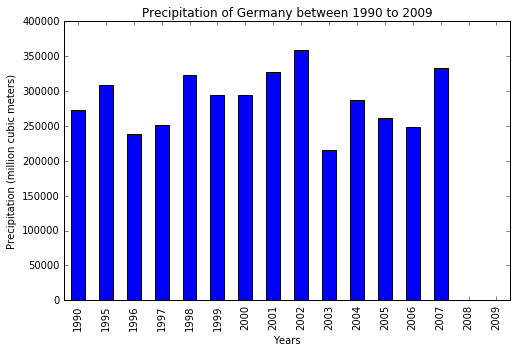

In [7]:
germany = precipitation_df.ix['Germany']
ax = germany.plot(kind='bar', figsize=(8,5), title="Precipitation of %s between 1990 to 2009" % germany.name)
ax.set_ylabel("Precipitation (million cubic meters)")
ax.set_xlabel("Years");

Another possibility is to import the `matplotlib` library and use it directly for plotting the precipitation values in France:

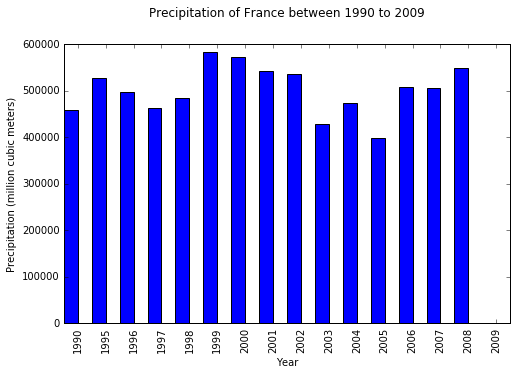

In [8]:
import matplotlib.pyplot as plt, numpy as np

france = precipitation_df.ix['France']
years = france.index
index = np.arange(len(years))  
plt.figure(figsize=(8,5))
bar_width = 0.5
plt.bar(index, france, bar_width, color='b')
plt.xlabel("Year")
plt.ylabel("Precipitation (million cubic meters)")
plt.title("Precipitation of %s between 1990 to 2009" % france.name, y=1.08)
plt.xticks(index + bar_width, years, rotation=90)
plt.show()

### Plot the countries or areas with the highest total precipitation

To get a list of the countries with the highest total precipitation, you have to compute the sum of all annual precipitation. You can do this by using the `pandas` `sum()` method. This method adds an  additional column called SUM, which contains the sums of the annual precipitation values to the `precipitation_df` DataFrame.

In [9]:
precipitation_df["SUM"] = precipitation_df.sum(axis=1)

Next, sort the DataFrame by total precipitation and print the top five countries or areas with the highest total precipitation:

In [10]:
precipitation_sorted_df = precipitation_df.sort_values(by="SUM",ascending=False)
top5_sums = pd.Series(precipitation_sorted_df["SUM"].head(5))
top5_sums

Country or Area
China        59269500.0000
Colombia     35600950.0000
Venezuela    22160738.6250
India        16000000.0000
Chile        15940757.0625
Name: SUM, dtype: float64

Now, plot the top five countries next to each another in a line graph for a better comparison of the recordings:

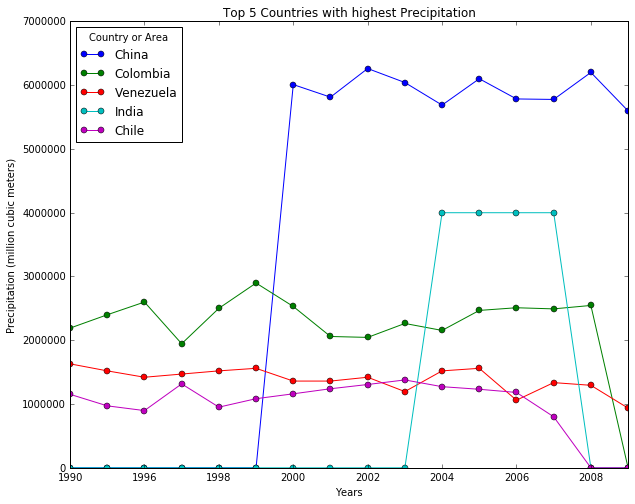

In [11]:
top5_bars = precipitation_sorted_df[years][0:5].transpose()
ax = top5_bars.plot(figsize=(10,8), marker='o', linestyle='-', title="Top 5 Countries with highest Precipitation")
ax.set_xlabel("Years")
ax.set_ylabel("Precipitation (million cubic meters)");

Finally, compare the annual precipitation for the top five countries. China has the highest annual precipitation, followed by Colombia. The line graph also shows that some values are missing, which makes comparing measurements difficult. 

To show the total precipitation for the top five countries in relation to the total precipitation for all countries over the entire time period, use a pie chart. Run the next code cell to create a pie chart by using the `matplotlib` library:

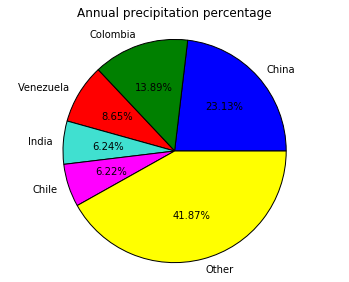

In [12]:
precipitation_sums = top5_sums
other_sums = precipitation_sorted_df["SUM"][5:].sum()
precipitation_sums["Other"] = other_sums

plt.axis('equal')
plt.title("Annual precipitation percentage",y=1.08)
plt.pie(
    precipitation_sums,
    labels=precipitation_sums.index,
    colors=['blue', 'green', 'red', 'turquoise', 'magenta','yellow'],
    autopct="%1.2f%%",
    radius=1.25);

The pie chart shows you that nearly a quarter of the precipitation fell in China, and that more than  half of the precipitation fell in the five countries with the highest annual precipitation.

###  Plot the countries with a negative annual precipitation trend

Going through each row in the DataFrame and looking at the figures is not a viable solution to determine trends. Plotting a bar chart for each country or area is possible, but inconvenient. 

One way to determine trends in annual precipitation is to fit a line to the data points. Run the next code cell to create a bar chart showing the annual precipitation trend for Chile:

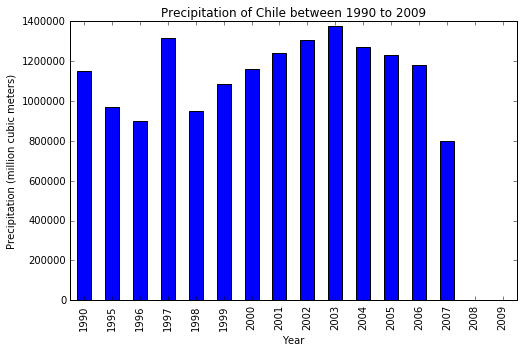

In [13]:
chile = precipitation_sorted_df.ix['Chile'][:-1]
years = chile.index
chile.plot(kind='bar', figsize=(8,5), title="Precipitation of %s between 1990 to 2009" % chile.name)
plt.xlabel("Year")
plt.ylabel("Precipitation (million cubic meters)");

A line of best fit is a straight line that is the best approximation of the given set of data.
The `polyfit()` function fits a line through data points. Because the DataFrame you are using is two-dimentional, it returns two values, the slope and the intercept. To determine whether the trend is positive or negative, you need only the slope. And naturally, you have to exclude any data points that correpond to the value 0.0. 

Run the next cells to determine and line plot the trend for Chile:

In [14]:
index = chile[chile>0.0].index
fit = np.polyfit(index.astype('int'), chile[index].values,1)
print "slope: " + str(fit[0])

slope: 5451.91305205


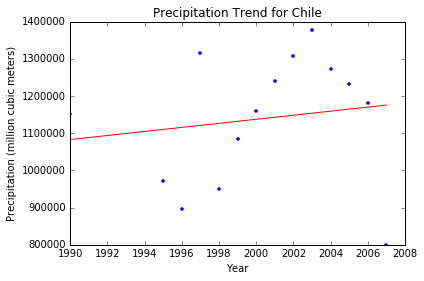

In [15]:
plt.plot(index, chile[index],'.')
plt.plot(index, fit[0]*index.astype('int') + fit[1], '-', color='red')
plt.title("Precipitation Trend for Chile")
plt.xlabel("Year")
plt.ylabel("Precipitation (million cubic meters)")
plt.show()

For Chile, the line plot shows a positive trend in annual precipitation, despite the fact that during the last couple of years the annual precipitation decreased. 

The next cells show you how to determine the precipitation trends for 91 countries.
Run the next code cell to define the `compute_slope()` method to compute the slope of a fitted line  between given points:

In [16]:
def compute_slope(row):
    """ This method computes the slope of a fittet line for given data points. 
    For arguments containing less than two valid data points it returns a NaN."""
    slope = np.nan
    years = row[row>0.0].index
    if(len(years)>=2):
        fit = np.polyfit(years.astype('int'), row[years].values,1)
        slope = fit[0]
    return slope

After defining the `compute_slope()` method, use the `pandas` `apply()` method to compute the slope for each row in the DataFrame and add the computed slope value to a new column called TREND:

In [17]:
precipitation_df["TREND"] = precipitation_sorted_df[years].apply(compute_slope, axis=1)
precipitation_df.head()

,1990,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,SUM,TREND
Country or Area,,,,,,,,,,,,,,,,,,
Albania,28385.000000,40311.000000,0.000000,0.000000,0.0,38284.000000,30683.000000,30491.000000,35883.000000,27893.000000,42787.000000,42840.000000,32380.000000,30964.000000,0.000000,0.000000,380901.000000,170.395758
Algeria,76160.000000,90270.000000,53380.000000,74460.000000,66470.0,50150.000000,64430.000000,43840.000000,37317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,0.000000,656477.000000,22.513699
Andorra,539.947998,510.673004,560.340027,434.475006,254.0,450.151001,518.666016,456.626007,565.559021,566.583008,567.044006,530.278015,353.220001,306.630005,0.000000,0.000000,6614.193115,-4.757211
Anguilla,93.099998,100.730003,0.000000,0.000000,0.0,0.000000,68.190002,70.730003,68.190002,108.769997,84.250000,124.400002,99.550003,86.290001,96.889999,71.080002,1072.170013,-0.019358
Antigua and Barbuda,300.299988,374.500000,323.299988,279.200012,384.5,426.799988,249.600006,238.000000,268.600006,253.899994,426.899994,371.000000,332.799988,293.600006,392.500000,276.899994,5192.399963,0.219277


If the value is positive, the annual precipitation trend for the country is positive. If the value is negative, the annual precipitation trend is negative. Values near zero indicate a stable condition. 

To determine the countries with a negative precipitation trend, find the rows in the DataFrame with a negative value in the TREND column:

In [18]:
negative_trends = precipitation_df[precipitation_df["TREND"]<0.0]
negative_trends.index

Index([u'Andorra', u'Anguilla', u'Bahrain', u'Barbados',
       u'Central African Republic', u'China', u'China, Hong Kong SAR', u'Cuba',
       u'Denmark', u'Egypt', u'Estonia', u'Guinea', u'Iraq', u'Israel',
       u'Italy', u'Kazakhstan', u'Latvia', u'Lebanon', u'Lithuania',
       u'Luxembourg', u'Marshall Islands', u'Monaco', u'Morocco', u'Paraguay',
       u'Poland', u'Portugal', u'Qatar', u'Republic of Moldova', u'Slovenia',
       u'Spain', u'Switzerland', u'Togo', u'Tunisia', u'Venezuela', u'Yemen'],
      dtype='object', name=u'Country or Area')

<a id="download"></a>
## 6. Download the notebook

After you have finished your analysis, you can download the notebook and share your results with our users.

To download your note, click **File** and then **Download as** from the notebook menu bar. You can download your notebook to your local file system in various formats.

<a id="summary"></a>
## Summary

In this sample, you learned the basic tools for working with notebooks. You learned how to use the preinstalled `pandas` library to explore and analyze precipitation data to gain insights about the distribution of precipitation in 91 countries and detect trends. You learned to use the `matplotlib` libraries to visualize your results in different ways, for example as bar charts, pie charts, and line graphs. 

This notebook runs on Python 2 with Spark 2.0.

### Resources

[Learn Python the Hard Way](http://learnpythonthehardway.org/book/)<br/> 
[Python Programming Language](https://www.python.org/)<br/> 
[IPython Notebook](http://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Index.ipynb)<br/> 
[Jupyter Notebook](http://jupyter.readthedocs.org/en/latest/)<br/> 
[A gallery of interesting Notebooks](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)<br/> 

Check out these interesting tutorials on YouTube:

[PyData 2015 - Introduction to Pandas](https://www.youtube.com/watch?v=TSsSWuhBpmY)

[Matplotlib Python Tutorial](https://www.youtube.com/watch?v=wAwQ-noyB98)

### Author
Sven Hafeneger is a member of the Data Science Experience development team at IBM Analytics in Germany. He holds a M.Sc. in Bioinformatics and is passionate about data analysis, machine learning and the Python ecosystem for data science. 

Copyright © 2017 IBM. This notebook and its source code are released under the terms of the MIT License.